## Getting data from kaggle

In [52]:
# Run this cell and select the kaggle.json file downloaded
# from the Kaggle account settings page.
from google.colab import files
files.upload()  #Kaggle>account>API json file

Saving kaggle.json to kaggle (1).json


{'kaggle.json': b'{"username":"yrnigam","key":"e3150b4aa6190820a3dd39ab57e3196c"}'}

In [53]:
# Let's make sure the kaggle.json file is present.
!ls -lha kaggle.json

-rw-r--r-- 1 root root 63 Feb  8 07:35 kaggle.json


In [0]:
# Next, install the Kaggle API client.
!pip install -q kaggle

In [0]:
# The Kaggle API client expects this file to be in ~/.kaggle,
# so move it there.
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

# This permissions change avoids a warning on Kaggle tool startup.
!chmod 600 ~/.kaggle/kaggle.json

In [56]:
# Copy the stackoverflow data set locally.
!kaggle datasets download -d datafiniti/consumer-reviews-of-amazon-products

consumer-reviews-of-amazon-products.zip: Skipping, found more recently modified local copy (use --force to force download)


In [0]:
! unzip -q -n 'consumer-reviews-of-amazon-products.zip'

In [58]:
!ls

 1429_1.csv
 consumer-reviews-of-amazon-products.zip
 Datafiniti_Amazon_Consumer_Reviews_of_Amazon_Products.csv
 Datafiniti_Amazon_Consumer_Reviews_of_Amazon_Products_May19.csv
'kaggle (1).json'
 kaggle.json
 sample_data


In [0]:
#Importing necessary libraries
import pandas as pd
from nltk.corpus import stopwords
import string
import matplotlib.pyplot as plt
from nltk.tokenize import word_tokenize

In [60]:
#Creating dataframe of amazon reviews from csv
df=pd.read_csv('Datafiniti_Amazon_Consumer_Reviews_of_Amazon_Products_May19.csv')
df.columns

Index(['id', 'dateAdded', 'dateUpdated', 'name', 'asins', 'brand',
       'categories', 'primaryCategories', 'imageURLs', 'keys', 'manufacturer',
       'manufacturerNumber', 'reviews.date', 'reviews.dateSeen',
       'reviews.didPurchase', 'reviews.doRecommend', 'reviews.id',
       'reviews.numHelpful', 'reviews.rating', 'reviews.sourceURLs',
       'reviews.text', 'reviews.title', 'reviews.username', 'sourceURLs'],
      dtype='object')

In [61]:
#Shape of dataframe
df.shape

(28332, 24)

In [0]:
#Filtering Columns
df=df[['reviews.rating' , 'reviews.text' , 'reviews.title']]

## Inspection of Data

In [63]:
df.head()

,reviews.rating,reviews.text,reviews.title
0,3,I order 3 of them and one of the item is bad q...,... 3 of them and one of the item is bad quali...
1,4,Bulk is always the less expensive way to go fo...,... always the less expensive way to go for pr...
2,5,Well they are not Duracell but for the price i...,... are not Duracell but for the price i am ha...
3,5,Seem to work as well as name brand batteries a...,... as well as name brand batteries at a much ...
4,5,These batteries are very long lasting the pric...,... batteries are very long lasting the price ...


In [64]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28332 entries, 0 to 28331
Data columns (total 3 columns):
reviews.rating    28332 non-null int64
reviews.text      28332 non-null object
reviews.title     28332 non-null object
dtypes: int64(1), object(2)
memory usage: 664.2+ KB


In [65]:
#Checking for null values
print(df.isnull().sum())

reviews.rating    0
reviews.text      0
reviews.title     0
dtype: int64


In [0]:
#removing missing values
#df=df.dropna(how="any")

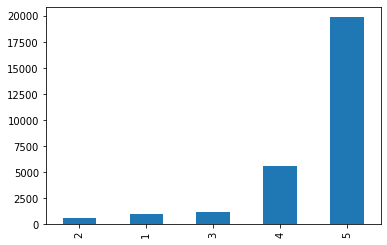

In [67]:
#ploting graph on the basis of review ratings
df["reviews.rating"].value_counts().sort_values().plot.bar()

### Above graph shows maximum reviews are positive.

In [68]:
#Rating value counts
df['reviews.rating'].value_counts()

5    19897
4     5648
3     1206
1      965
2      616
Name: reviews.rating, dtype: int64

In [0]:
sentiment = {1: 0,
            2: 0,
            3: 1,
            4: 2,
            5: 2}

df["sentiment"] = df["reviews.rating"].map(sentiment)

In [70]:
df.head()

,reviews.rating,reviews.text,reviews.title,sentiment
0,3,I order 3 of them and one of the item is bad q...,... 3 of them and one of the item is bad quali...,1
1,4,Bulk is always the less expensive way to go fo...,... always the less expensive way to go for pr...,2
2,5,Well they are not Duracell but for the price i...,... are not Duracell but for the price i am ha...,2
3,5,Seem to work as well as name brand batteries a...,... as well as name brand batteries at a much ...,2
4,5,These batteries are very long lasting the pric...,... batteries are very long lasting the price ...,2


In [71]:
#sentiment value counts
df.sentiment.value_counts()

2    25545
0     1581
1     1206
Name: sentiment, dtype: int64

In [0]:
#implementing bag of words using CountVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from nltk.tokenize import RegexpTokenizer
#tokenizer to remove unwanted elements from out data like symbols and numbers
token = RegexpTokenizer(r'[a-zA-Z0-9]+')
cv = CountVectorizer(lowercase=True,stop_words='english',ngram_range = (1,1),tokenizer = token.tokenize)
text_counts= cv.fit_transform(df['reviews.text'])

In [73]:
print(text_counts[0])

  (0, 6275)	1
  (0, 155)	1
  (0, 4930)	1
  (0, 1033)	1
  (0, 7098)	1
  (0, 5783)	1
  (0, 1027)	1
  (0, 8413)	1
  (0, 6499)	1
  (0, 658)	1
  (0, 5520)	1
  (0, 1127)	1
  (0, 9927)	1


In [0]:
#Split train and test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(text_counts, df['reviews.rating'], test_size=0.3, random_state=1)

In [0]:
from sklearn.naive_bayes import MultinomialNB
# Model Generation Using Multinomial Naive Bayes
clf = MultinomialNB().fit(X_train, y_train)
predicted= clf.predict(X_test)

In [76]:
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics
print("BoW MultinomialNB Accuracy:",metrics.accuracy_score(y_test, predicted))

BoW MultinomialNB Accuracy: 0.7448235294117647


In [0]:
#Using TF-IDF approach
from sklearn.feature_extraction.text import TfidfVectorizer
tf=TfidfVectorizer()
text_tf= tf.fit_transform(df['reviews.text'])

In [0]:
#Split train and test set
X_train, X_test, y_train, y_test = train_test_split(text_tf, df['reviews.rating'], test_size=0.3, random_state=1)

In [79]:
#Again Generating model Using Multinomial Naive Bayes
clf = MultinomialNB().fit(X_train, y_train)
predicted= clf.predict(X_test)
print("TF-IDF MultinomialNB Accuracy:",metrics.accuracy_score(y_test, predicted))

TF-IDF MultinomialNB Accuracy: 0.7038823529411765


In [80]:
# Random Forests
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier().fit(X_train, y_train)
predicted= classifier.predict(X_test)
print("Random Forests Accuracy:",metrics.accuracy_score(y_test, predicted))

Random Forests Accuracy: 0.8464705882352941


**Hence Random Forests gives Accuracy: 84.6, which is a good score**